In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Helper.ImportDatasetQuantiles import *
from Method.QuantileUncertaintyCalculations import *

# Normal Approximation
To smoothen out the Non Parametric method and make it more efficient we check how well the normal approximation of the binomial is for our range of sammple lengths

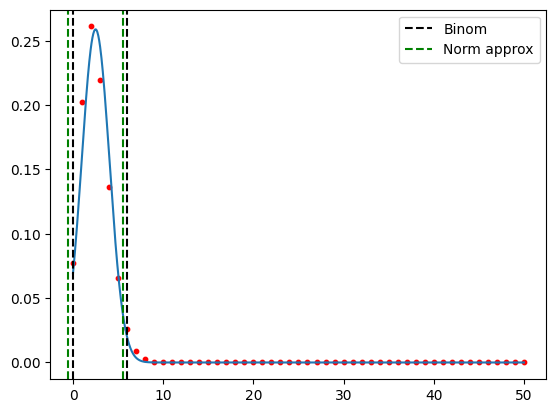

In [9]:
from scipy.stats import norm

n = 50
sigma = 0.05
probabilities = binomial(n, sigma, np.arange(0, n+1))

# bar chart of probabilities
plt.scatter(range(len(probabilities)), probabilities, color='red', s=10)

# now for a normal approximation
mean = n*sigma
std = np.sqrt(n*sigma*(1-sigma))

# plot the normal approximation
x = np.linspace(0, n, 1000)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

cumulated_probs = np.cumsum(probabilities)
lower_index, upper_index = calculate_confidence_interval(cumulated_probs, 0.05)

# vertical lines at the indices
plt.axvline(lower_index, color='black', linestyle='dashed', label='Binom')
plt.axvline(upper_index, color='black', linestyle='dashed')

# Get inverse of cdf at 2.5 and 97.5
lower = norm.ppf(0.025, mean, std)
upper = norm.ppf(0.975, mean, std)

# plot vertical lines for the normal approximation
plt.axvline(lower, color='green', linestyle='dashed', label='Norm approx')
plt.axvline(upper, color='green', linestyle='dashed')

# show legend
plt.legend()